## 1. Data Preprocessing

In [1]:
#importing required libraries
import pandas as pd
import missingno as msno 
import numpy as np
import imblearn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn import metrics 
from sklearn.metrics import roc_curve

In [2]:
#read the data
data= pd.read_csv("D:/7150CEM/Data/FinalData/FifthYear.csv")
#Dropping target feature
data1 = data.drop('class',axis=1)
y = data['class']
#data visualization
data1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,15182.0000,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,2341.8000,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,33401.0000,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,2789.6000,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,1.2437,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622


In [3]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   5907 non-null   float64
 1   Attr2   5907 non-null   float64
 2   Attr3   5907 non-null   float64
 3   Attr4   5889 non-null   float64
 4   Attr5   5899 non-null   float64
 5   Attr6   5907 non-null   float64
 6   Attr7   5907 non-null   float64
 7   Attr8   5892 non-null   float64
 8   Attr9   5909 non-null   float64
 9   Attr10  5907 non-null   float64
 10  Attr11  5907 non-null   float64
 11  Attr12  5889 non-null   float64
 12  Attr13  5910 non-null   float64
 13  Attr14  5907 non-null   float64
 14  Attr15  5904 non-null   float64
 15  Attr16  5892 non-null   float64
 16  Attr17  5892 non-null   float64
 17  Attr18  5907 non-null   float64
 18  Attr19  5910 non-null   float64
 19  Attr20  5910 non-null   float64
 20  Attr21  5807 non-null   float64
 21  Attr22  5907 non-null   float64
 22  

In [4]:
#looking for null values
data1.isnull().sum()

Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
         ... 
Attr60    268
Attr61     15
Attr62      0
Attr63     21
Attr64    107
Length: 64, dtype: int64

<Axes: >

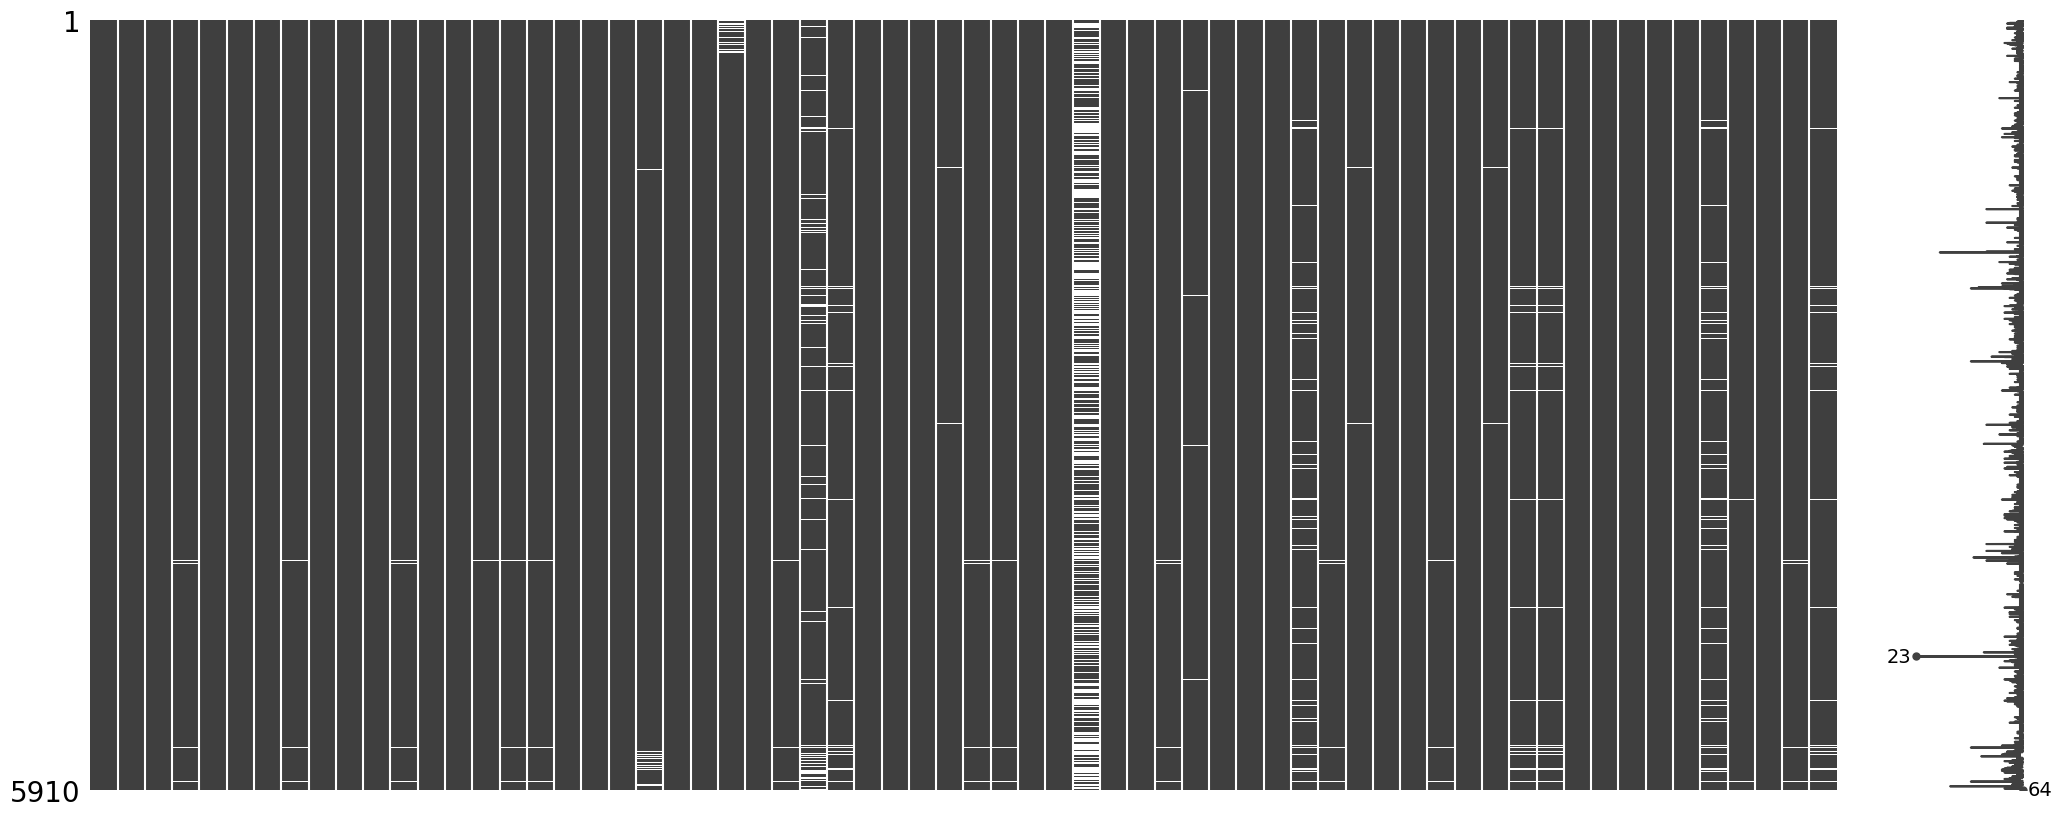

In [5]:
#Matrix for the Missing values
msno.matrix(data1)

In [6]:
#drop the null values
data_1st=data1.dropna()

In [7]:
#calculate data loss percentage
per_1st = ((len(data1)-len(data_1st))/len(data1))*100
print("percentage of data loss after removing the null values: ", per_1st)

percentage of data loss after removing the null values:  48.71404399323181


## 2. Data Imputation
### 2.1 KNN Imputation

In [8]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(data1)

In [9]:
# Final Data 
data1 = pd.DataFrame(df_filled)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5910 non-null   float64
 1   1       5910 non-null   float64
 2   2       5910 non-null   float64
 3   3       5910 non-null   float64
 4   4       5910 non-null   float64
 5   5       5910 non-null   float64
 6   6       5910 non-null   float64
 7   7       5910 non-null   float64
 8   8       5910 non-null   float64
 9   9       5910 non-null   float64
 10  10      5910 non-null   float64
 11  11      5910 non-null   float64
 12  12      5910 non-null   float64
 13  13      5910 non-null   float64
 14  14      5910 non-null   float64
 15  15      5910 non-null   float64
 16  16      5910 non-null   float64
 17  17      5910 non-null   float64
 18  18      5910 non-null   float64
 19  19      5910 non-null   float64
 20  20      5910 non-null   float64
 21  21      5910 non-null   float64
 22  

In [10]:
#rename column values
data1.columns=['ROA', 'TDTA', 'WCTA','CAAL','DIR','REL','EBIT','BV','ATR','ETA','GPEIFE','GPL','GPDS','GPI','LGPD','GPDL','TATL','GPA','Revenue','ITS','NS','OCFTA','NPS','GPA_3','ESTA','SR','POATFE','WCFA','FS','TLCS','GPIS','CLTCOGS','OPSL','OPTL','PSTA','ATR','CAIL','CCTA','PSS','CAIRSL','TLOAD','POAS','RRIT','RS','PI','CAISL','ICOGS','POADTA_EBITDA','POADS_EBITDA','CR','SLTA','SLCOGS','EFAR','CCFA','WC','SCOGSS','CAISL_SGPD','CSR','LLE','SI','STR','SLS','SSL','SFA']
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ROA            5910 non-null   float64
 1   TDTA           5910 non-null   float64
 2   WCTA           5910 non-null   float64
 3   CAAL           5910 non-null   float64
 4   DIR            5910 non-null   float64
 5   REL            5910 non-null   float64
 6   EBIT           5910 non-null   float64
 7   BV             5910 non-null   float64
 8   ATR            5910 non-null   float64
 9   ETA            5910 non-null   float64
 10  GPEIFE         5910 non-null   float64
 11  GPL            5910 non-null   float64
 12  GPDS           5910 non-null   float64
 13  GPI            5910 non-null   float64
 14  LGPD           5910 non-null   float64
 15  GPDL           5910 non-null   float64
 16  TATL           5910 non-null   float64
 17  GPA            5910 non-null   float64
 18  Revenue 

## 3. Data Standardization

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting the data into 80-20 ratio
X_train,X_test,y_train,y_test= train_test_split(data1,y,test_size=0.2,random_state = 42)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4. Data Balance

In [12]:
# target feature 'class' Count
class_0 = data[data['class'] == 0]
class_1 = data[data['class'] == 1]
#print the shape of the class variable
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (5500, 65)
class 1: (410, 65)


### 4.1 SMOTE Over-Sampling technique

In [13]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

# fit predictor and target variable
X_train, y_train = smote.fit_resample(X_train,y_train)

## 5. Feature Selection
### 5.1 PCA Analysis

variance expalined: [9.73839853e-01 2.36126782e-02 1.58335504e-03 4.40618818e-04
 1.08718307e-04 6.61796758e-05 5.61269910e-05 5.58763937e-05
 5.34746922e-05 3.77147800e-05 2.82781177e-05 2.62798756e-05
 1.81373361e-05 1.43193970e-05 1.15408822e-05 1.10615006e-05
 7.09600321e-06 5.16112492e-06 4.57122039e-06 3.18573302e-06
 3.03229374e-06 2.71382857e-06 2.58214417e-06 2.15742398e-06
 1.12021109e-06 7.24095453e-07 6.68646263e-07 6.31672982e-07
 4.86925606e-07 4.39942805e-07 2.73045386e-07 1.91858412e-07
 1.43996217e-07 1.16185979e-07 9.10176629e-08 8.38001140e-08
 6.79822031e-08 5.61071779e-08 4.52923895e-08 3.29128221e-08
 2.60541280e-08 2.26626472e-08 1.57251854e-08 1.08723635e-08
 7.85078586e-09 6.52977267e-09 5.26660227e-09 4.97952960e-09
 4.16408582e-09 3.15847701e-09 2.39518574e-09 1.21309793e-09
 6.65102362e-10 4.25694894e-10 4.16960737e-10 2.74725412e-10
 2.35789730e-10 2.18894656e-10 1.72959060e-10 6.65043827e-11
 6.99659996e-12 6.63099473e-16 6.56762640e-17 6.43131895e-33]
var

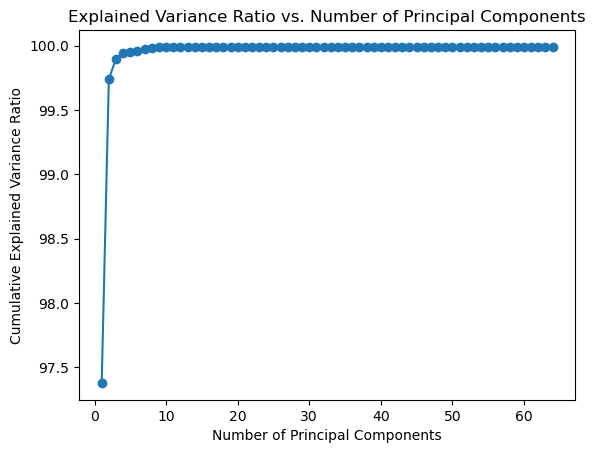

In [14]:
from sklearn.decomposition import PCA
# PCA Analysis for all components of train data
pca = PCA(n_components=64)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

variance expalined: [9.73839853e-01 2.36126782e-02 1.58335504e-03 4.40618818e-04
 1.08718307e-04 6.61796758e-05 5.61269910e-05 5.58763937e-05
 5.34746922e-05 3.77147800e-05]
variance : [97.38 99.74 99.9  99.94 99.95 99.96 99.97 99.98 99.99 99.99]


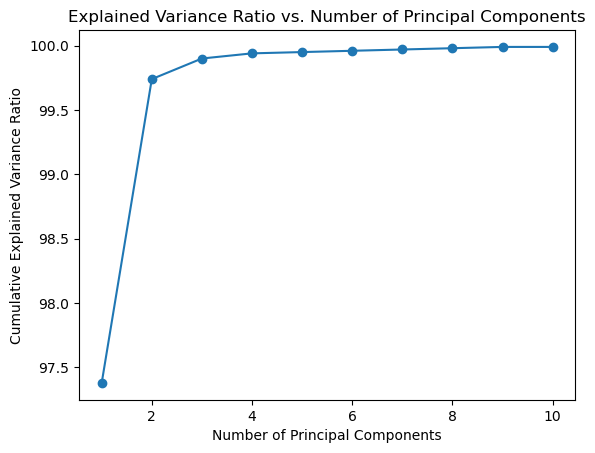

In [15]:
from sklearn.decomposition import PCA
# PCA Analysis with 10 components of train data
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()


## 6. Machine Learning techniques
### 6.1 Logistic regression

In [16]:
import sklearn.linear_model as lm 
from sklearn.linear_model import LogisticRegression
#logistic Regression
LR=lm.LogisticRegression(max_iter = 300) 
LR.fit(X_train,y_train) 
LR_pred= LR.predict(X_test) 
#train and test accuracy scores
trACC_LR=LR.score(X_train,y_train) 
tesACC_LR=LR.score(X_test,y_test) 
print('Train Accuracy for Logistic Regression : ',trACC_LR) 
print('Test Accuracy for Logistic Regression : ', tesACC_LR,"\n") #83.50


Train Accuracy for Logistic Regression :  0.7355943738656987
Test Accuracy for Logistic Regression :  0.8350253807106599 



In [17]:
#Confusion matrix
LR_cf = confusion_matrix(y_test,LR_pred) 
print('confusion matrix for LR:\n',LR_cf)

#printingcclassification report of Confusion matrix 
LR_matrix = classification_report(y_test,LR_pred) 
print('Classification Report for LR:\n',LR_matrix) 

confusion matrix for LR:
 [[983 109]
 [ 86   4]]
Classification Report for LR:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1092
           1       0.04      0.04      0.04        90

    accuracy                           0.84      1182
   macro avg       0.48      0.47      0.47      1182
weighted avg       0.85      0.84      0.84      1182



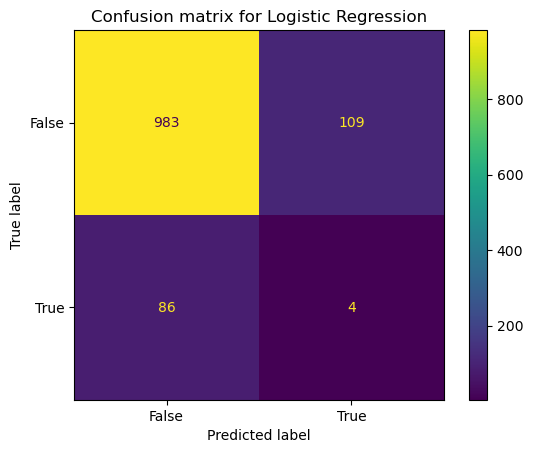

In [18]:
#plotting Confusion matrix  
LR_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_cf,display_labels = [False,True]) 
LR_cm_display.plot() 
plt.title('Confusion matrix for Logistic Regression') 
plt.show()

### 6.2 Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
#Decision tree classifier
DT= DecisionTreeClassifier()
DT.fit(X_train, y_train) 
DT_pred = DT.predict(X_test)
#train and test accuracies
trACC_DT=DT.score(X_train,y_train) 
tesACC_DT=DT.score(X_test,y_test) 
print('Train Accuracy for Decision Tree  : ',trACC_DT) 
print('Test Accuracy for Decision Tree : ', tesACC_DT,"\n") #67.68

Train Accuracy for Decision Tree  :  1.0
Test Accuracy for Decision Tree :  0.676818950930626 



In [20]:
#Confusion Matrix
DT_cf = confusion_matrix(y_test,DT_pred) 
print('confusion matrix for DT:\n',DT_cf) 

#Classification report of Confusion matrix 
DT_matrix = classification_report(y_test,DT_pred) 
print('Classification Report for DT:\n',DT_matrix) 


confusion matrix for DT:
 [[779 313]
 [ 69  21]]
Classification Report for DT:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80      1092
           1       0.06      0.23      0.10        90

    accuracy                           0.68      1182
   macro avg       0.49      0.47      0.45      1182
weighted avg       0.85      0.68      0.75      1182



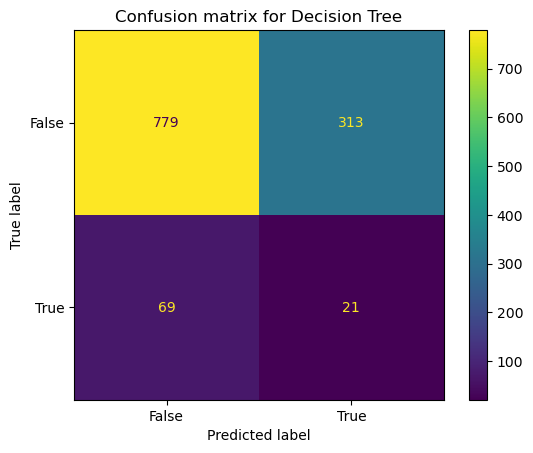

In [21]:
#plotting Confusion matrix  
DT_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = DT_cf,display_labels = [False,True]) 
DT_cm_display.plot() 
plt.title('Confusion matrix for Decision Tree') 
plt.show()

### 6.3 Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
RF= RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train) 
RF_pred = RF.predict(X_test)
#train and test accuracies
trACC_RF=RF.score(X_train,y_train) 
tesACC_RF=RF.score(X_test,y_test) 
print('Train Accuracy for Random Forest  : ',trACC_RF) 
print('Test Accuracy for Random Forest : ', tesACC_RF,"\n") #91.79


Train Accuracy for Random Forest  :  1.0
Test Accuracy for Random Forest :  0.9179357021996616 



In [23]:
#Confusion Matrix
RF_cf = confusion_matrix(y_test,RF_pred) 
print('confusion matrix for RF:\n',RF_cf) 

#Classification report of confusion matrix 
RF_matrix = classification_report(y_test,RF_pred) 
print('Classification Report for RF:\n',RF_matrix) 

confusion matrix for RF:
 [[1085    7]
 [  90    0]]
Classification Report for RF:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1092
           1       0.00      0.00      0.00        90

    accuracy                           0.92      1182
   macro avg       0.46      0.50      0.48      1182
weighted avg       0.85      0.92      0.88      1182



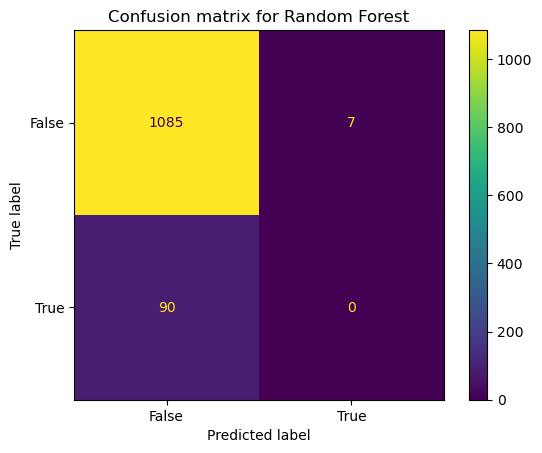

In [24]:
#plotting Confusion matrix  
RF_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = RF_cf,display_labels = [False,True]) 
RF_cm_display.plot() 
plt.title('Confusion matrix for Random Forest') 
plt.show()

### 6.4 Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Classifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, y_train)
GB_pred = GB.predict(X_test)
#train and test accuracies
trACC_GB=GB.score(X_train,y_train) 
tesACC_GB=GB.score(X_test,y_test) 
print('Train Accuracy for Gradient Boost  : ',trACC_GB) 
print('Test Accuracy for Gradient Boost : ', tesACC_GB,"\n") # 27.15


Train Accuracy for Gradient Boost  :  0.786070780399274
Test Accuracy for Gradient Boost :  0.2715736040609137 



In [26]:
#Confusion Matrix
GB_cf = confusion_matrix(y_test,GB_pred) 
print('confusion matrix for GB:\n',GB_cf) 

#Classification report of Confusion matrix
GB_matrix = classification_report(y_test,GB_pred) 
print('Classification Report for GB:\n',GB_matrix)


confusion matrix for GB:
 [[269 823]
 [ 38  52]]
Classification Report for GB:
               precision    recall  f1-score   support

           0       0.88      0.25      0.38      1092
           1       0.06      0.58      0.11        90

    accuracy                           0.27      1182
   macro avg       0.47      0.41      0.25      1182
weighted avg       0.81      0.27      0.36      1182



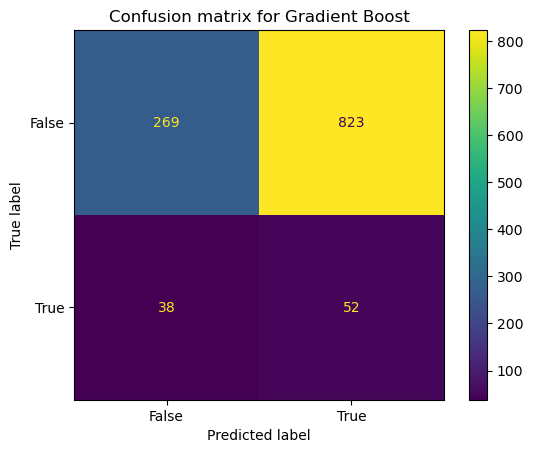

In [27]:
#plotting Confusion matrix  
GB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = GB_cf,display_labels = [False,True]) 
GB_cm_display.plot() 
plt.title('Confusion matrix for Gradient Boost') 
plt.show()

### 6.5 Extreme Gradient Boosting Classifier (XGBoosting)

In [28]:
import xgboost as xgb
# Train a XGB model using the scikit-learn API
XGB = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)
#train and test Accuracies
trACC_XGB=XGB.score(X_train,y_train) 
tesACC_XGB=XGB.score(X_test,y_test) 
print('Train Accuracy for Xtreme Gradient Boost  : ',trACC_XGB) 
print('Test Accuracy for Xtreme Gradient Boost : ', tesACC_XGB,"\n") #22.58

Train Accuracy for Xtreme Gradient Boost  :  0.8106851179673321
Test Accuracy for Xtreme Gradient Boost :  0.22588832487309646 



In [29]:
#Confusion Matrix
XGB_cf = confusion_matrix(y_test,XGB_pred) 
print('confusion matrix for XGB:\n',XGB_cf) 

#Classification report of Confusion matrix 
XGB_matrix = classification_report(y_test,XGB_pred) 
print('Classification Report for XGB:\n',XGB_matrix) 


confusion matrix for XGB:
 [[209 883]
 [ 32  58]]
Classification Report for XGB:
               precision    recall  f1-score   support

           0       0.87      0.19      0.31      1092
           1       0.06      0.64      0.11        90

    accuracy                           0.23      1182
   macro avg       0.46      0.42      0.21      1182
weighted avg       0.81      0.23      0.30      1182



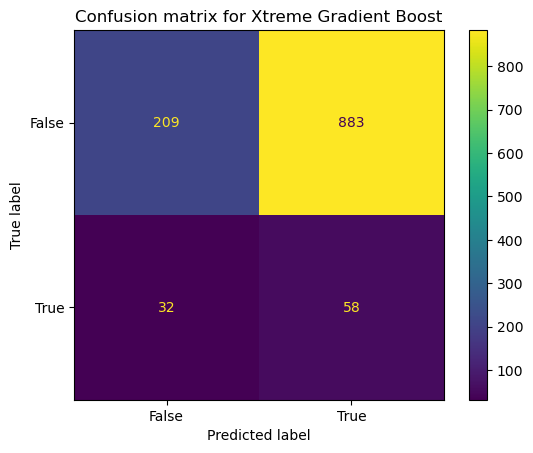

In [30]:
#plotting Confusion matrix  
XGB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = XGB_cf,display_labels = [False,True]) 
XGB_cm_display.plot() 
plt.title('Confusion matrix for Xtreme Gradient Boost') 
plt.show()

### 6.6 Support Vector Machine

In [31]:
from sklearn.svm import SVC
#Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
#train and test Accuracies
trACC_svc=svc.score(X_train,y_train) 
tesACC_svc=svc.score(X_test,y_test) 
print('Train Accuracy for SVM  : ',trACC_svc) 
print('Test Accuracy for SVM : ', tesACC_svc,"\n") #90.43


Train Accuracy for SVM  :  0.753970054446461
Test Accuracy for SVM :  0.9043993231810491 



In [32]:
#Confusion Matrix
svc_cf = confusion_matrix(y_test,svc_pred) 
print('confusion matrix for SVM:\n',svc_cf) 

#Classification report of Confusion matrix metrics 
svc_matrix = classification_report(y_test,svc_pred) 
print('Classification Report for SVM:\n',svc_matrix) 

confusion matrix for SVM:
 [[1064   28]
 [  85    5]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1092
           1       0.15      0.06      0.08        90

    accuracy                           0.90      1182
   macro avg       0.54      0.51      0.52      1182
weighted avg       0.87      0.90      0.88      1182



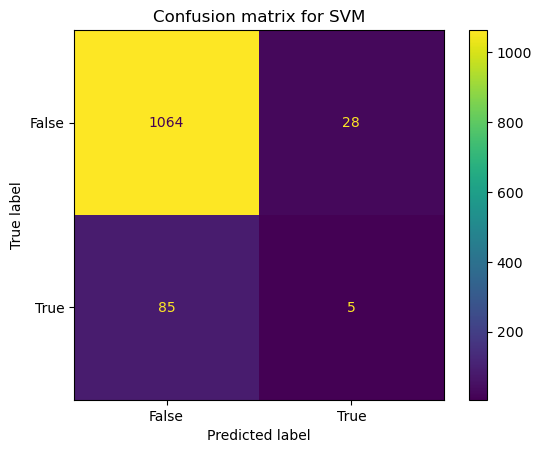

In [33]:
#plotting Confusion matrix  
svc_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_cf,display_labels = [False,True]) 
svc_cm_display.plot() 
plt.title('Confusion matrix for SVM') 
plt.show()

## 7. ROC Curve

In [34]:
# ROC curve for Decision Tree 
DT_pred_prob = DT.predict_proba(X_test) 
DT_pred_prob = DT_pred_prob[:,1] 
DT_fpr,DT_tpr,_=roc_curve(y_test,DT_pred_prob) 

# ROC for Logistic regression 
LR_pred_prob = LR.predict_proba(X_test) 
LR_pred_prob = LR_pred_prob[:,1] 
LR_fpr,LR_tpr,_=roc_curve(y_test,LR_pred_prob) 

#ROC for Random Forest
RF_pred_prob = RF.predict_proba(X_test)
RF_pred_prob = RF_pred_prob[:,1]
RF_fpr,RF_tpr,_=roc_curve(y_test,RF_pred_prob)

#ROC curve for GB
GB_pred_prob = GB.predict_proba(X_test)
GB_pred_prob = GB_pred_prob[:,1]
GB_fpr,GB_tpr,_=roc_curve(y_test,GB_pred_prob)

#ROC curve for XGB
XGB_pred_prob = XGB.predict_proba(X_test)
XGB_pred_prob = XGB_pred_prob[:,1]
XGB_fpr,XGB_tpr,_=roc_curve(y_test,XGB_pred_prob)

#ROC curve for SVC
svc_pred_prob = svc.predict_proba(X_test)
svc_pred_prob = svc_pred_prob[:,1]
svc_fpr,svc_tpr,_=roc_curve(y_test,svc_pred_prob)

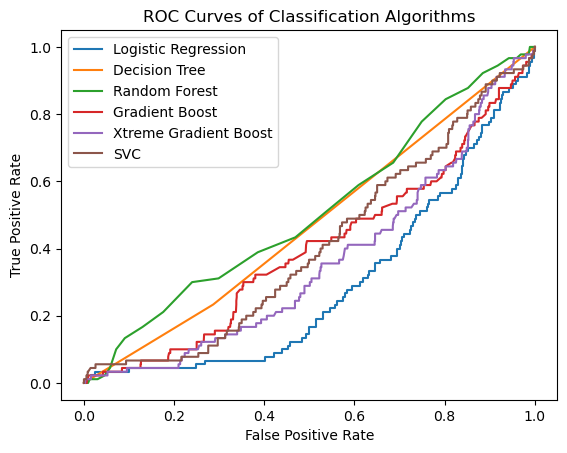

In [35]:
#plotting Roc_curve 
plt.figure() 
plt.plot(LR_fpr,LR_tpr,label = 'Logistic Regression') 
plt.plot(DT_fpr,DT_tpr,label = 'Decision Tree') 
plt.plot(RF_fpr,RF_tpr,label = 'Random Forest')
plt.plot(GB_fpr,GB_tpr,label = 'Gradient Boost')
plt.plot(XGB_fpr,XGB_tpr,label = 'Xtreme Gradient Boost')
plt.plot(svc_fpr,svc_tpr,label='SVC')
plt.title('ROC Curves of Classification Algorithms') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend() 
plt.show()

## 8. Accuracies of Machine Learning Algorithms

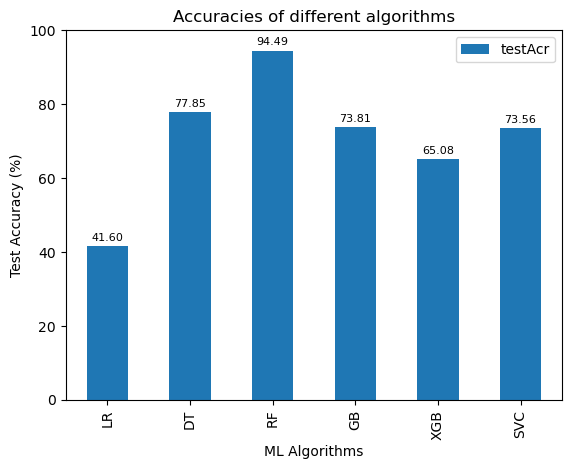

In [37]:
#Accuracy plot of Different Machine Learning methods 
dt = [['LR',trACC_LR*100,tesACC_LR*100],['DT',trACC_DT*100,tesACC_DT*100],['RF',trACC_RF*100,tesACC_RF*100],['GB',trACC_GB*100,tesACC_GB*100],['XGB',trACC_XGB*100,tesACC_XGB*100],['SVC',trACC_svc*100,tesACC_svc*100]] 
df = pd.DataFrame(dt, columns=['Name','trainAcr','testAcr']) 
plots = df.plot.bar(x='Name',y = 'testAcr',width = 0.5) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')
plt.title('Accuracies of different algorithms') 
plt.xlabel('ML Algorithms') 
plt.ylabel('Test Accuracy (%)') 
plt.ylim(0,100)
plt.show()